<a href="https://colab.research.google.com/github/UdayLab/geoanalytics/blob/main/tests/patternMining/frequentpatternminingtutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In this exercise, we learn the process to find useful patterns hidden in the raster data.

# Step 1: Install the Necessary Libraries

In [ ]:
# Installing necessary modules
!apt update
!apt install -y nco cdo gdal-bin
!which ncrename
!which cdo
!which gdal_translate

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:5 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:6 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
37 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InR

In [ ]:
!pip install -U geoanalytics ipydatagrid

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 25.8 MB/s eta 0:00:00


In [ ]:
!pip show geoanalytics

Name: geoanalytics
Version: 2025.7.2.3
Summary: This software is being developed at the University of Aizu, Aizu-Wakamatsu, Fukushima, Japan
Home-page: https://github.com/UdayLab/geoanalytics
Author: 
Author-email: Rage Uday Kiran <uday.rage@gmail.com>
License: GPLv3
Location: /usr/local/lib/python3.11/dist-packages
Requires: deprecated, deprecation, discord.py, fancyimpute, fastparquet, matplotlib, mplcursors, networkx, numba, numpy, pami, pandas, Pillow, plotly, psutil, psycopg2-binary, rasterio, resource, scikit-learn, shapely, sphinx, sphinx-rtd-theme, tqdm, urllib3, validators
Required-by: 


# Step 2: Python code creating a synthethic tiff file containing 25 pixels (5 x 5) and 10 bands.

## Step 2.1: Generating the synthetic tiff file

In [ ]:
import numpy as np
import rasterio
from rasterio.enums import Compression
from rasterio.transform import from_origin
from rasterio.crs import CRS
import csv

# Image parameters
width, height = 5, 5
bands = 10
pixel_size = 1.0  # 1 degree per pixel
top_left_lon = 0.0
top_left_lat = 5.0  # Top-left starting coordinate

# Define transform and CRS
transform = from_origin(top_left_lon, top_left_lat, pixel_size, pixel_size)
crs = CRS.from_epsg(4326)

# Generate random image data (bands, height, width)
data = np.random.randint(1, 101, size=(bands, height, width), dtype=np.uint8)

# Save as GeoTIFF
output_tif = 'random_10band_5x5_wgs84.tif'
with rasterio.open(
    output_tif,
    'w',
    driver='GTiff',
    width=width,
    height=height,
    count=bands,
    dtype='uint8',
    crs=crs,
    transform=transform,
    compress=Compression.none
) as dst:
    for i in range(bands):
        dst.write(data[i], i + 1)

# Prepare CSV data and print output
csv_file = 'pixel_data.csv'
headers = ['lon', 'lat'] + [f'band{b+1}' for b in range(bands)]

rows = []
rows.append(headers)

# Print and store rows: lon, lat, band1...band10
print("\n" + "\t".join(headers))
for y in range(height):
    for x in range(width):
        lon, lat = transform * (x + 0.5, y + 0.5)  # pixel center
        values = [data[b, y, x] for b in range(bands)]
        row = [round(lon, 2), round(lat, 2)] + values
        rows.append(row)
        print("\t".join(map(str, row)))

# Save to CSV
with open(csv_file, mode='w', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(rows)

print(f"\n✅ TIFF saved to: {output_tif}")
print(f"✅ CSV saved to: {csv_file}")



lon	lat	band1	band2	band3	band4	band5	band6	band7	band8	band9	band10
0.5	4.5	59	71	53	69	21	19	80	9	87	38
1.5	4.5	72	21	2	37	48	41	87	93	3	16
2.5	4.5	90	29	88	51	32	20	13	90	89	45
3.5	4.5	28	44	74	94	94	81	91	10	93	58
4.5	4.5	81	53	15	21	28	85	28	33	15	51
0.5	3.5	76	17	4	48	84	89	6	92	66	77
1.5	3.5	59	48	81	71	94	31	35	95	10	84
2.5	3.5	46	19	47	25	90	18	53	34	92	90
3.5	3.5	20	68	98	32	51	43	67	66	93	48
4.5	3.5	90	17	11	76	21	61	70	8	8	97
0.5	2.5	61	43	17	91	37	73	57	63	95	18
1.5	2.5	35	96	7	77	40	58	65	46	100	84
2.5	2.5	26	57	17	21	96	89	21	99	30	55
3.5	2.5	85	32	57	70	94	75	30	58	70	69
4.5	2.5	59	57	21	13	14	24	1	83	11	66
0.5	1.5	72	33	10	78	16	75	53	7	34	95
1.5	1.5	39	10	65	98	8	48	48	28	25	85
2.5	1.5	89	97	72	38	78	23	65	86	94	42
3.5	1.5	46	38	49	77	76	54	22	70	55	45
4.5	1.5	89	38	77	28	2	48	91	92	44	41
0.5	0.5	15	55	69	5	63	35	13	96	27	25
1.5	0.5	59	44	72	72	38	89	97	23	11	72
2.5	0.5	38	22	93	46	77	57	46	70	100	57
3.5	0.5	13	57	92	39	75	39	15	77	98	44
4.5	0.5	7	3	92	92	46	89	48	41

## Step 2.2: Viewing the tiff file

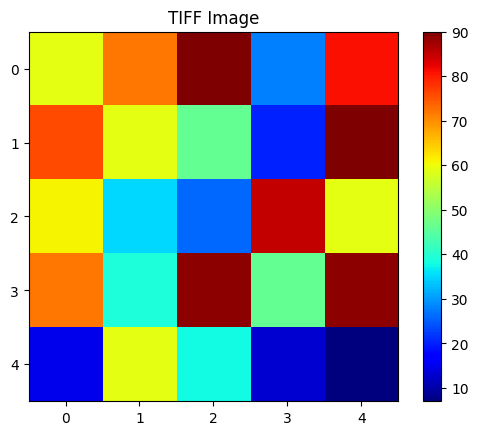

In [ ]:
from geoanalytics.visualization import TiffViewer

viewer = TiffViewer.TiffViewer(inputFile='random_10band_5x5_wgs84.tif')

viewer.run(cmap='jet', title='TIFF Image')

# Step 3: Hypothetical Assumption about this Dataset


* Let us assume the raster data represents an imagenary surface of a Celestial body (or object).
* Band represents the wavelength or time.

**For brevity, let us consider the above raster data represents the sea surface temperatures on the planet earth.**  

# Step 4: Problem Statement

Useful patterns of various types are hidden in this raster data. These patterns can empower the users to gain competitive advantage and achieve socioeconomic development.  In this exercise, we try to extract this information in form of frequently occurring patterns.

**Since we are consider our data as sea surface temperatures, we try to identify the areas where high temperatures are frequently observed collectively**

# Step 5: Identifying the locations where high SSTs were observed **simultaneously** (Frequent Pattern Discovery)

## Step 5.1: Creation of Binary Matrix (or transactional database)

* Let us consider any value greater than or equal to 50 represents high SST. Anything else, low SST, and we are not interested in those recording.

* Let us binarize the matrix such that
   * band value = 1 means corresponding pixel recorded high temperature at that respective band
   * band value = 0 means corresponding pixel recorded low temperature at that respective band

In [ ]:
import pandas as pd

#Reading the CSV data
df = pd.read_csv('pixel_data.csv', sep=',')
df

,lon,lat,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10
0,0.5,4.5,59,71,53,69,21,19,80,9,87,38
1,1.5,4.5,72,21,2,37,48,41,87,93,3,16
2,2.5,4.5,90,29,88,51,32,20,13,90,89,45
3,3.5,4.5,28,44,74,94,94,81,91,10,93,58
4,4.5,4.5,81,53,15,21,28,85,28,33,15,51
5,0.5,3.5,76,17,4,48,84,89,6,92,66,77
6,1.5,3.5,59,48,81,71,94,31,35,95,10,84
7,2.5,3.5,46,19,47,25,90,18,53,34,92,90
8,3.5,3.5,20,68,98,32,51,43,67,66,93,48
9,4.5,3.5,90,17,11,76,21,61,70,8,8,97


In [ ]:
from geoanalytics.conversion import RasterDF2DB

# Pass the dataframe as input dataframe
obj = RasterDF2DB.RasterDF2DB(dataframe=df)

#Preparing the binary transactional database
obj.prepareTransactionalDataframe()

#Creation of a transactional database
obj.convertToTransactionalDB(DBname='transactionalDB.csv', condition='>=', thresholdValue=50)

Saved transaction DB to: transactionalDB.csv


## Step 5.2: Print the transactional database and check out its contents

In [ ]:
!cat transactionalDB.csv

Point(0.5 4.5)	Point(1.5 4.5)	Point(2.5 4.5)	Point(4.5 4.5)	Point(0.5 3.5)	Point(1.5 3.5)	Point(4.5 3.5)	Point(0.5 2.5)	Point(3.5 2.5)	Point(4.5 2.5)	Point(0.5 1.5)	Point(2.5 1.5)	Point(4.5 1.5)	Point(1.5 0.5)
Point(0.5 4.5)	Point(4.5 4.5)	Point(3.5 3.5)	Point(1.5 2.5)	Point(2.5 2.5)	Point(4.5 2.5)	Point(2.5 1.5)	Point(0.5 0.5)	Point(3.5 0.5)
Point(0.5 4.5)	Point(2.5 4.5)	Point(3.5 4.5)	Point(1.5 3.5)	Point(3.5 3.5)	Point(3.5 2.5)	Point(1.5 1.5)	Point(2.5 1.5)	Point(4.5 1.5)	Point(0.5 0.5)	Point(1.5 0.5)	Point(2.5 0.5)	Point(3.5 0.5)	Point(4.5 0.5)
Point(0.5 4.5)	Point(2.5 4.5)	Point(3.5 4.5)	Point(1.5 3.5)	Point(4.5 3.5)	Point(0.5 2.5)	Point(1.5 2.5)	Point(3.5 2.5)	Point(0.5 1.5)	Point(1.5 1.5)	Point(3.5 1.5)	Point(1.5 0.5)	Point(4.5 0.5)
Point(3.5 4.5)	Point(0.5 3.5)	Point(1.5 3.5)	Point(2.5 3.5)	Point(3.5 3.5)	Point(2.5 2.5)	Point(3.5 2.5)	Point(2.5 1.5)	Point(3.5 1.5)	Point(0.5 0.5)	Point(2.5 0.5)	Point(3.5 0.5)
Point(3.5 4.5)	Point(4.5 4.5)	Point(0.5 3.5)	Point(4.5 3.5)	Point(0.5 

Meaning of the created dataset:
* Each line represents a band. Our raster file contains 10 bands. So we will have 10 lines (or transactions).
* Each line denotes the pixels that have recorded value that satisfied the user-specified condition.

**In this tutorial, each line represents the pixels that have recorded high SSTs at their respective bands.**

In [ ]:
# Just for verifying purposes we are printing the first two (data) lines of the files: pixel_data.csv and transactionalDB.csv
!head -3 pixel_data.csv # contains header row
!head -2 transactionalDB.csv

lon,lat,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10
0.5,4.5,59,71,53,69,21,19,80,9,87,38
1.5,4.5,72,21,2,37,48,41,87,93,3,16
Point(0.5 4.5)	Point(1.5 4.5)	Point(2.5 4.5)	Point(4.5 4.5)	Point(0.5 3.5)	Point(1.5 3.5)	Point(4.5 3.5)	Point(0.5 2.5)	Point(3.5 2.5)	Point(4.5 2.5)	Point(0.5 1.5)	Point(2.5 1.5)	Point(4.5 1.5)	Point(1.5 0.5)
Point(0.5 4.5)	Point(4.5 4.5)	Point(3.5 3.5)	Point(1.5 2.5)	Point(2.5 2.5)	Point(4.5 2.5)	Point(2.5 1.5)	Point(0.5 0.5)	Point(3.5 0.5)


## Step 5.3: To specify appropriate hyper-parameter (minimum support) for the frequent pattern model we need to study the distribution (or statistical details) of the constructed transactional database.

Database size (total no of transactions) : 10
Number of items : 25
Minimum Transaction Size : 9
Average Transaction Size : 13.0
Maximum Transaction Size : 15
Standard Deviation Transaction Size : 1.6733200530681511
Variance in Transaction Sizes : 3.111111111111111
Sparsity : 0.48


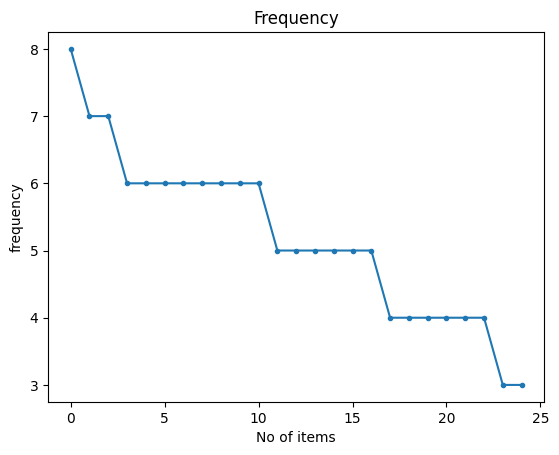

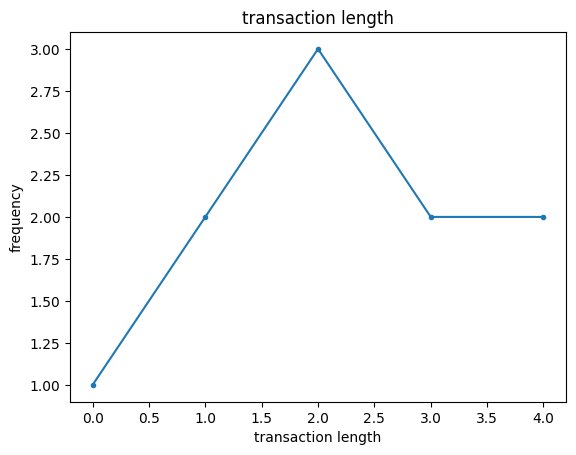

In [ ]:
from geoanalytics.patternMining import FrequentPatternMining as pm

alg = pm.FrequentPatternMining(inputFile='transactionalDB.csv')
alg.showDBstats()

## Step 5.4: Mining Frequent Patterns

Let minSup be 4. It means we are finding the sets of pixels where high SSTs were simultaneously observed at least 4 times (out of 10 times/bands) in our dataset.

In other words, we are finding the sets of pixels that have simultaneously observed high SSTs at least 40% of the time.

In [ ]:
alg.run(minSupport=4)

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total number of Frequent Patterns: 176
Total Memory in USS: 248819712
Total Memory in RSS 270077952
Total ExecutionTime in ms: 0.004024505615234375


We have identified 93 sets of locations that have simultaneously recorded high levels of SSTs.

## Step 5.5: Saving the generated frequent patterns

In [ ]:
alg.save(outputFile='FrequentPatterns.txt')
df1=alg.saveAsDataframe()

df1

Frequent patterns saved to: FrequentPatterns.txt


,Patterns,Support
0,Point(4.5 4.5),4
1,Point(4.5 2.5),4
2,Point(4.5 1.5),4
3,Point(4.5 1.5)\tPoint(2.5 1.5),4
4,Point(0.5 0.5),4
...,...,...
171,Point(2.5 1.5)\tPoint(3.5 4.5),4
172,Point(2.5 1.5)\tPoint(3.5 2.5),5
173,Point(3.5 4.5),7
174,Point(3.5 4.5)\tPoint(3.5 2.5),6


In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

from ipydatagrid import DataGrid
DataGrid(df1)

DataGrid(auto_fit_params={'area': 'all', 'padding': 30, 'numCols': None}, corner_renderer=None, default_render…

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

## Step 5.6: Printing the generated frequent patterns

In [ ]:
!tail -10 FrequentPatterns.txt

Point(1.5 1.5)	Point(1.5 3.5):5
Point(1.5 1.5)	Point(4.5 1.5):5
Point(1.5 1.5)	Point(4.5 1.5)	Point(1.5 3.5):4
Point(4.5 1.5):7
Point(4.5 1.5)	Point(1.5 3.5):6
Point(4.5 0.5):7
Point(4.5 0.5)	Point(4.5 1.5):4
Point(1.5 3.5)	Point(4.5 0.5)	Point(4.5 1.5):4
Point(4.5 0.5)	Point(1.5 3.5):7
Point(1.5 3.5):9


**Format - pattern:frequency**

* The first frequent pattern provides the information that the pixels or points (3.5,1.5) and (0.5,4.5) have simultaneously observed high SSTs 60% of the time in the dataset.
* Similar statements can be made for remaining frequent patterns.
* Long patterns are often interesting to the users. So you can identify long patterns and study them seperately.
* Frequent patterns containing single pixel/point may be ignored.

## Step 5.7: Visualizing Long Patterns

In [ ]:
from PAMI.extras.graph import visualizePatterns as fig

obj = fig.visualizePatterns('FrequentPatterns.txt',10)
obj.visualize(width=1000,height=900)

Number 	 Pattern
2	Point(1.5 3.5)	Point(3.5 3.5)	Point(4.5 1.5)
3	Point(1.5 3.5)	Point(1.5 1.5)	Point(3.5 3.5)
4	Point(4.5 1.5)	Point(1.5 1.5)	Point(3.5 3.5)
5	Point(1.5 1.5)	Point(4.5 3.5)	Point(4.5 1.5)
6	Point(1.5 1.5)	Point(4.5 1.5)	Point(1.5 3.5)
7	Point(1.5 3.5)	Point(4.5 0.5)	Point(4.5 1.5)
8	Point(4.5 1.5)	Point(1.5 3.5)	Point(3.5 4.5)	Point(4.5 0.5)
9	Point(1.5 3.5)	Point(3.5 3.5)	Point(2.5 0.5)	Point(4.5 1.5)
10	Point(1.5 3.5)	Point(1.5 4.5)	Point(4.5 3.5)	Point(3.5 3.5)
11	Point(1.5 3.5)	Point(4.5 1.5)	Point(1.5 1.5)	Point(3.5 3.5)


/usr/local/lib/python3.11/dist-packages/kaleido/__init__.py:14: UserWarning:




This means that static image generation (e.g. `fig.write_image()`) will not work.

Please upgrade Plotly to version 6.1.1 or greater, or downgrade Kaleido to version 0.2.1.




In [ ]:
minConf = 0.5

In [ ]:
from PAMI.AssociationRules.basic import confidence as alg
obj = alg.confidence(df1, minConf, sep='\t')
obj.mine()
obj.printResults()
obj.save("associationRulesconfidence.csv")
obj.getAssociationRulesAsDataFrame()

Association rules successfully  generated from frequent patterns 
Total number of Association Rules: 434
Total Memory in USS: 234627072
Total Memory in RSS 255692800
Total ExecutionTime in ms: 0.0007951259613037109


,Patterns,Support
0,Point(0.5 2.5),4.000000
1,Point(0.5 2.5)\tPoint(1.5 3.5),4.000000
2,Point(2.5 1.5),4.000000
3,Point(2.5 1.5)\tPoint(4.5 1.5),4.000000
4,Point(1.5 1.5)\tPoint(2.5 1.5),4.000000
...,...,...
429,Point(4.5 0.5)\tPoint(4.5 1.5)\t->\tPoint(1.5 ...,1.000000
430,Point(4.5 0.5)\t->\tPoint(1.5 3.5)\tPoint(4.5 ...,0.571429
431,Point(4.5 1.5)\t->\tPoint(1.5 3.5)\tPoint(4.5 ...,0.571429
432,Point(1.5 3.5)\t->\tPoint(1.5 3.5)\tPoint(4.5 ...,0.777778
